Outcome vs IV

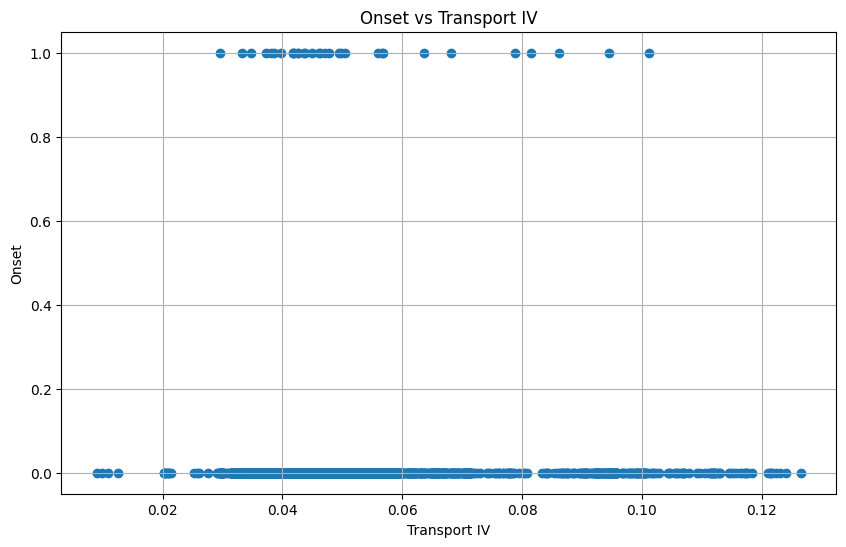

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data
df = pd.read_csv('../../data/gvcomix_data.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['trans_outp_p'], df['onset2COWCS'])
plt.xlabel('Transport IV')
plt.ylabel('Onset')
plt.title('Onset vs Transport IV')
plt.grid(True)
plt.show()

Independent vs IV

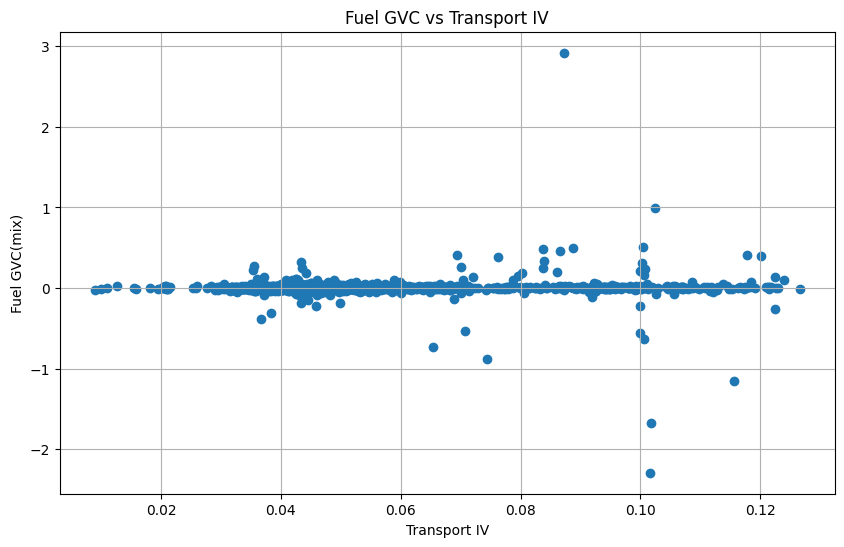

In [20]:
# Read the CSV data
df = pd.read_csv('../../data/gvcomix_data.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['trans_outp_p'], df['s6'])
plt.xlabel('Transport IV')
plt.ylabel('Fuel GVC(mix)')
plt.title('Fuel GVC vs Transport IV')
plt.grid(True)
plt.show()

Outcome Vs Independent

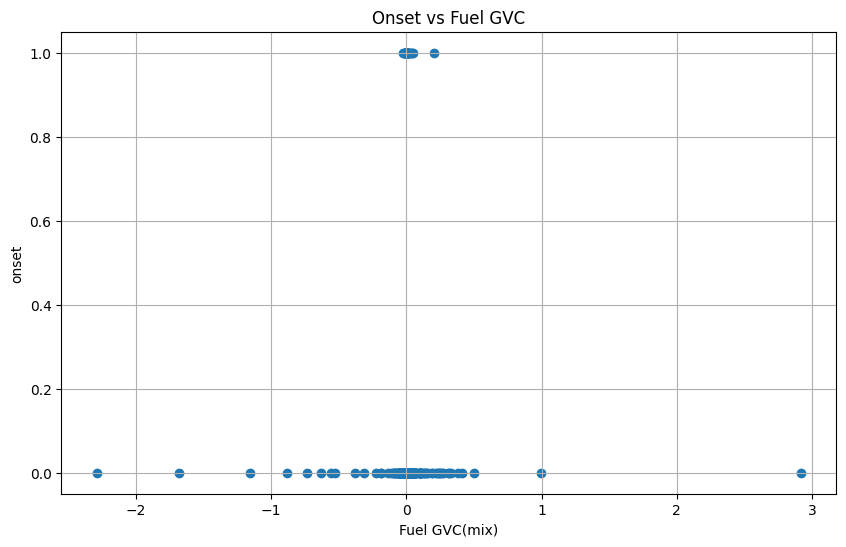

In [21]:
# Read the CSV data
df = pd.read_csv('../../data/gvcomix_data.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['s6'], df['onset2COWCS'])
plt.xlabel('Fuel GVC(mix)')
plt.ylabel('onset')
plt.title('Onset vs Fuel GVC')
plt.grid(True)
plt.show()

First stage residual vs IV

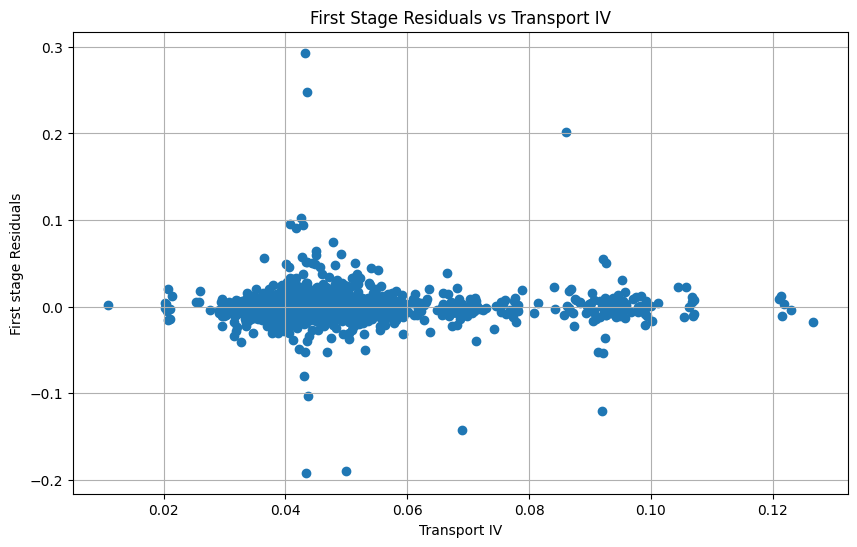

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Read the CSV data
df = pd.read_csv('../../data/gvcomix_data.csv')

# Drop rows with missing values in any of the columns used in the regression
columns_to_check = ['onset2COWCS','decade',
                         'logmountain', 'ethnic_fractionalization',
                         'religion_fractionalization', 'language_fractionalization',
                         'leg_british', 'opec',
                         'logpop_M_diff', 'logpopdens_diff', 'logoutreg_diff', 'ecgrowth_demeaned', 'democracy_diff']

# Replace infinite values with NaN
df[columns_to_check] = df[columns_to_check].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN in these columns
df = df.dropna(subset=columns_to_check)

# Run the first stage regression
X = df[['trans_outp_p', 'decade',
                         'logmountain', 'ethnic_fractionalization',
                         'religion_fractionalization', 'language_fractionalization',
                         'leg_british', 'opec',
                         'logpop_M_diff', 'logpopdens_diff', 'logoutreg_diff', 'ecgrowth_demeaned', 'democracy_diff']]  # iv and controls
y = df['s6']  
model = LinearRegression()
model.fit(X, y)

# Calculate the residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Plot the residuals against the IV
plt.figure(figsize=(10, 6))
plt.scatter(df['trans_outp_p'], residuals)
plt.xlabel('Transport IV')
plt.ylabel('First stage Residuals')
plt.title('First Stage Residuals vs Transport IV')
plt.grid(True)
plt.show()

Second stage residual vs independent

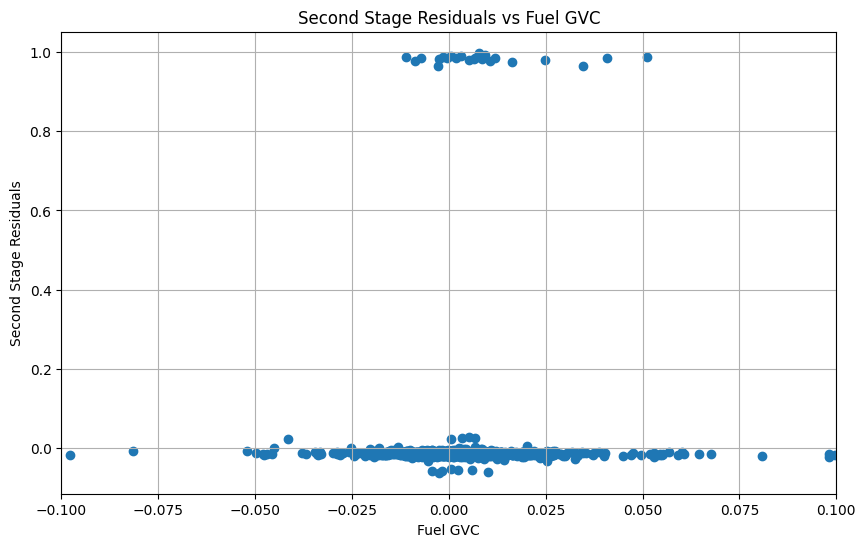

In [28]:
# Read the CSV data
df = pd.read_csv('../../data/gvcomix_data.csv')

# Drop rows with missing values in any of the columns used in the regression
columns_to_check = ['onset2COWCS','decade',
                         'logmountain', 'ethnic_fractionalization',
                         'religion_fractionalization', 'language_fractionalization',
                         'leg_british', 'opec',
                         'logpop_M_diff', 'logpopdens_diff', 'logoutreg_diff', 'ecgrowth_demeaned', 'democracy_diff']

# Replace infinite values with NaN
df[columns_to_check] = df[columns_to_check].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN in these columns
df = df.dropna(subset=columns_to_check)

# Run the first stage regression
X_first = df[['trans_outp_p', 'decade',
                         'logmountain', 'ethnic_fractionalization',
                         'religion_fractionalization', 'language_fractionalization',
                         'leg_british', 'opec',
                         'logpop_M_diff', 'logpopdens_diff', 'logoutreg_diff', 'ecgrowth_demeaned', 'democracy_diff']]  # iv and controls
y_first = df['s6']  
model_first = LinearRegression()
model_first.fit(X_first, y_first)

# Calculate the predicted values for the second stage regression
df['predicted_fuel_gvc'] = model_first.predict(X_first)

# Run the second stage regression
X_second = df[['predicted_fuel_gvc']]  # predicted endogenous variable
y_second = df['onset2COWCS']  # dependent variable
model_second = LinearRegression()
model_second.fit(X_second, y_second)

# Calculate the residuals
y_pred_second = model_second.predict(X_second)
residuals_second = y_second - y_pred_second

# Plot the residuals against the predicted endogenous variable
plt.figure(figsize=(10, 6))
plt.scatter(df['s6'], residuals_second)
plt.xlabel('Fuel GVC')
plt.ylabel('Second Stage Residuals')
plt.title('Second Stage Residuals vs Fuel GVC')
plt.grid(True)

plt.xlim(-0.1, 0.1) 

plt.show()

second stage residual vs IV

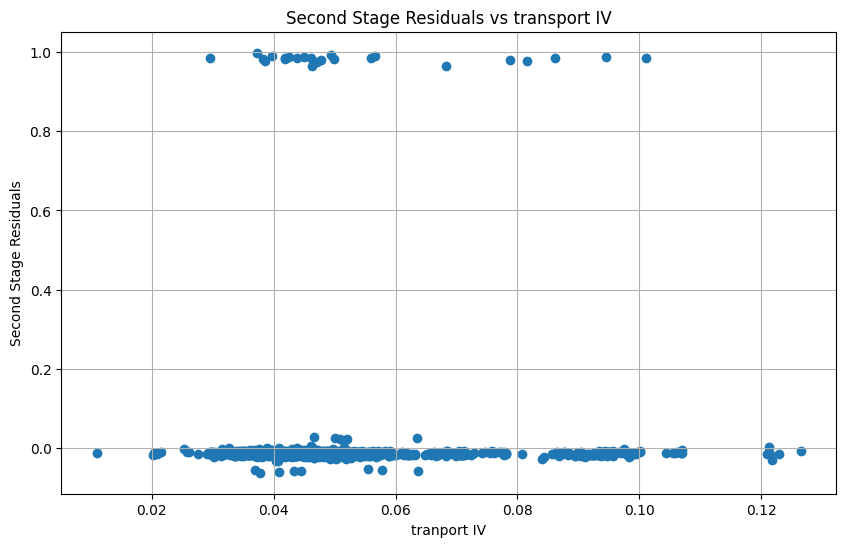

In [27]:
# Read the CSV data
df = pd.read_csv('../../data/gvcomix_data.csv')

# Drop rows with missing values in any of the columns used in the regression
columns_to_check = ['onset2COWCS','decade',
                         'logmountain', 'ethnic_fractionalization',
                         'religion_fractionalization', 'language_fractionalization',
                         'leg_british', 'opec',
                         'logpop_M_diff', 'logpopdens_diff', 'logoutreg_diff', 'ecgrowth_demeaned', 'democracy_diff']

# Replace infinite values with NaN
df[columns_to_check] = df[columns_to_check].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN in these columns
df = df.dropna(subset=columns_to_check)

# Run the first stage regression
X_first = df[['trans_outp_p', 'decade',
                         'logmountain', 'ethnic_fractionalization',
                         'religion_fractionalization', 'language_fractionalization',
                         'leg_british', 'opec',
                         'logpop_M_diff', 'logpopdens_diff', 'logoutreg_diff', 'ecgrowth_demeaned', 'democracy_diff']]  # iv and controls
y_first = df['s6']  
model_first = LinearRegression()
model_first.fit(X_first, y_first)

# Calculate the predicted values for the second stage regression
df['predicted_fuel_gvc'] = model_first.predict(X_first)

# Run the second stage regression
X_second = df[['predicted_fuel_gvc']]  # predicted endogenous variable
y_second = df['onset2COWCS']  # dependent variable
model_second = LinearRegression()
model_second.fit(X_second, y_second)

# Calculate the residuals
y_pred_second = model_second.predict(X_second)
residuals_second = y_second - y_pred_second

# Plot the residuals against the predicted endogenous variable
plt.figure(figsize=(10, 6))
plt.scatter(df['trans_outp_p'], residuals_second)
plt.xlabel('tranport IV')
plt.ylabel('Second Stage Residuals')
plt.title('Second Stage Residuals vs transport IV')
plt.grid(True)
plt.show()